In [52]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [17]:
with open('result.json', 'r', encoding='utf-8') as input_file: # result.json is exported telegram file
    x = json.load(input_file)
    

In [18]:
def get_data(input_file):
    global data
    data = x.get('messages')
    data = pd.DataFrame(data)
   
    key_list = ['id', 'type', 'date', 'from', 'text',
           'media_type', 'mime_type', 'duration_seconds', 
           'sticker_emoji', 'photo', 'edited', 'reply_to_message_id',
          'forwarded_from',]
    data = data[key_list]
    
    


In [19]:
get_data(x)

In [20]:
data_voice_length_stat = data.copy()
data_from = data_voice_length_stat.groupby('from')
msg_count = data_from['id'].count() # количество всех сообщений
avg_voice_length = data_from['duration_seconds'].mean()


data_voice = data[data['media_type'] == 'voice_message']
data_voice = data_voice[['id', 'from', 'duration_seconds', 'date']]
voice_data_from = data_voice.groupby('from')
voice_msg_count = voice_data_from['id'].count()


print('Количество сообщений', msg_count) 
print('---------------------------------')
print('Cредняя длина голосовых сообщений', avg_voice_length)
print('---------------------------------')
print('Количество голосовых сообщений', voice_msg_count)

Количество сообщений from
Danila         12027
Бриена Тард    21072
Name: id, dtype: int64
---------------------------------
Cредняя длина голосовых сообщений from
Danila         16.356358
Бриена Тард    36.634403
Name: duration_seconds, dtype: float64
---------------------------------
Количество голосовых сообщений from
Danila         7109
Бриена Тард    9789
Name: id, dtype: int64


In [21]:
def msg_count_graph():
    percentages = [round(100 * msg_count[0] / (msg_count[0] + msg_count[1]),1), round(100 * msg_count[1] / (msg_count[0] + msg_count[1]), 1)]
    names = ['{}, ({}, {}%)'.format(msg_count.index.values[0], str(msg_count[0]), percentages[0]), '{}, ({}, {}%)'.format(msg_count.index.values[1], str(msg_count[1]), percentages[1])]
    plt.rcParams['text.color'] = '#808080'
    plt.pie(msg_count, labels=names)
    plt.title('Количество всех сообщений', fontweight="bold", color="#808080")
    plt.show()
    
def voice_msg_count_graph():
    percentages = [round(100 * voice_msg_count[0] / (voice_msg_count[0] + voice_msg_count[1]),1), round(100 * voice_msg_count[1] / (voice_msg_count[0] + voice_msg_count[1]), 1)]
    names = ['{}, ({}, {}%)'.format(voice_msg_count.index.values[0], str(voice_msg_count[0]), percentages[0]), '{}, ({}, {}%)'.format(voice_msg_count.index.values[1], str(voice_msg_count[1]), percentages[1])]
    plt.rcParams['text.color'] = '#808080'
    plt.pie(voice_msg_count, labels=names)
    plt.title('Количество всех голосовых сообщений', fontweight="bold", color="#808080")
    plt.show()
    
def avg_voice_length_graph():
    names = ['{}, ({})'.format(avg_voice_length.index.values[0], str(round(avg_voice_length[0], 1))),'{}, ({})'.format(avg_voice_length.index.values[1], str(round(avg_voice_length[1],1)))]
    plt.rcParams['text.color'] = '#808080'
    height = [round(avg_voice_length[0], 1), round(avg_voice_length[1], 1)]
    plt.bar(names,height, ec="black")
    plt.title('Средняя длина голосовых сообщений', fontweight="bold", color="#808080")
    plt.show()
   
    

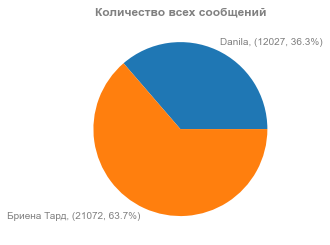

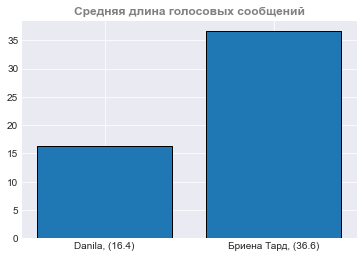

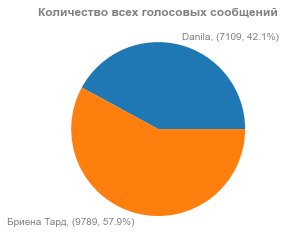

In [22]:
msg_count_graph()
avg_voice_length_graph()
voice_msg_count_graph()



In [23]:
def transform(data):
    data['modified_date'] = data['date']
    data['modified_date'] = pd.to_datetime(data['date']).dt.date
    data['modified_time'] = pd.to_datetime(data['date']).dt.time
    data['month_year'] = pd.to_datetime(data['date']).dt.to_period('M')
    return data

data = transform(data)


In [75]:
def seperated_messages(data, user_1, user_2, method): # modified_date or month_year #добавить проценты изменения
    
    user_1_table = data.loc[data['from'] == user_1]
    user_1_table = pd.DataFrame(user_1_table.groupby(by=method).size())
    user_2_table = data.loc[data['from'] == user_2]
    user_2_table = pd.DataFrame(user_2_table.groupby(by=method).size())
    result = pd.concat([user_1_table, user_2_table], axis=1)
    result.columns = [user_1,user_2]
    result = result.replace(np.nan, 0.0)
    result.sort_values(by=method, inplace=True)
    result['sum'] = result[user_1] + result[user_2]
    result['growth_rate'] = result['sum'].pct_change().round(2)
    return result[[user_1, user_2, 'growth_rate']] 
pd.set_option('display.max_rows', 58)
seperated_messages = seperated_messages(data, 'Danila', 'Бриена Тард', 'month_year')
seperated_messages


,Danila,Бриена Тард,growth_rate
month_year,,,
2020-07,1170,1937,NaN
2020-08,1224,2114,0.07
2020-09,1298,2109,0.02
2020-10,1126,1916,-0.11
2020-11,992,1720,-0.11
2020-12,1345,2320,0.35
2021-01,966,1623,-0.29
2021-02,599,1310,-0.26
2021-03,749,1469,0.16


<AxesSubplot:xlabel='month_year'>

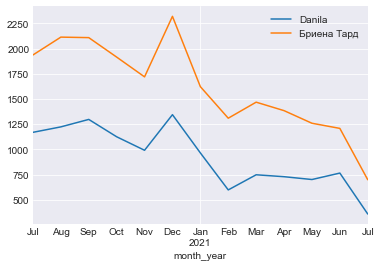

In [77]:
seperated_messages[['Danila', 'Бриена Тард']].plot()